1.Voltage smoothing

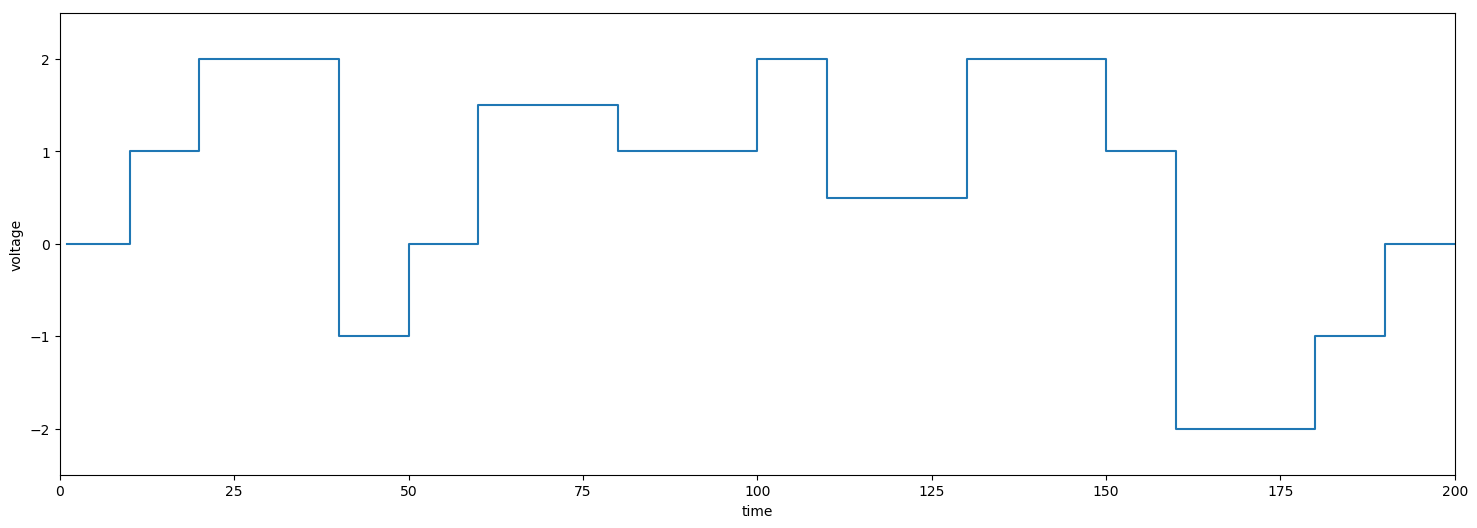

PyObject Text(24,0.5,u'voltage')

In [188]:
using PyPlot

voltage = readcsv("voltages.csv")
figure(figsize=(18,6))
axis([0,200,-2.5,2.5])
step(1:200, voltage)
xlabel("time")
ylabel("voltage")

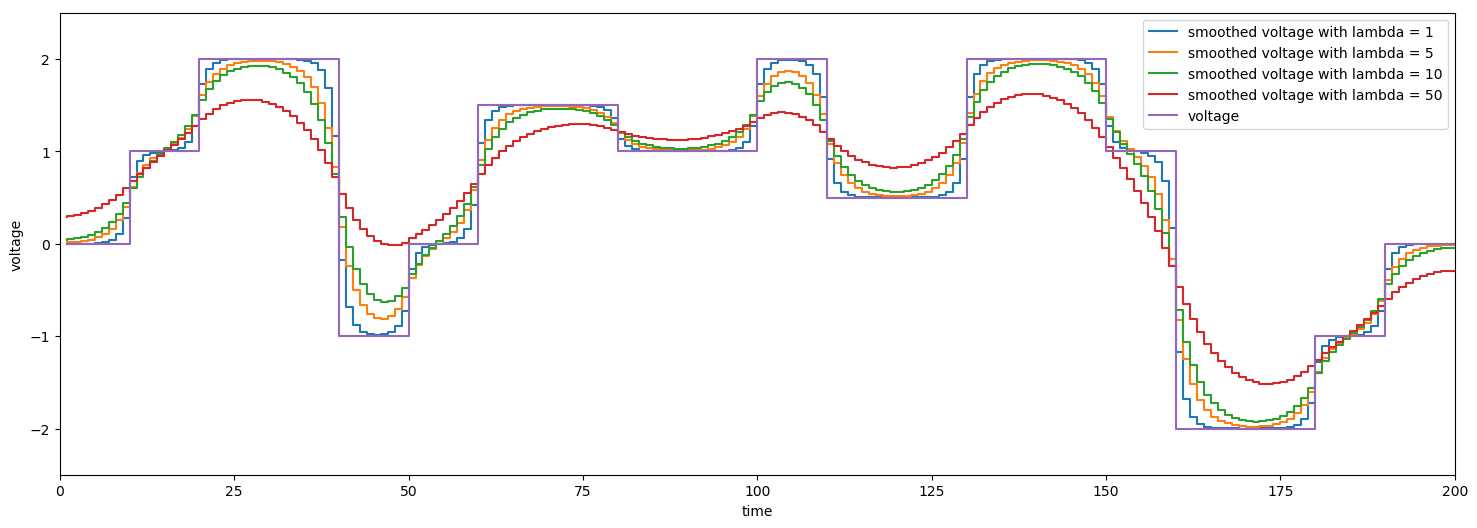

PyObject <matplotlib.legend.Legend object at 0x136c5e290>

In [189]:
using JuMP, Mosek

m = Model(solver=MosekSolver(LOG=0))
T = 200
@variable(m, v[1:T])
lambda = 1
@objective(m, Min, (sum( (voltage-v).^2 ) + lambda*sum( (v[2:T] - v[1:T-1]).^2) ))
status = solve(m)
v1 = getvalue(v)

m = Model(solver=MosekSolver(LOG=0))
T = 200
@variable(m, v[1:T])
lambda = 5
@objective(m, Min, (sum( (voltage-v).^2 ) + lambda*sum( (v[2:T] - v[1:T-1]).^2) ))
status = solve(m)
v2 = getvalue(v)

m = Model(solver=MosekSolver(LOG=0))
T = 200
@variable(m, v[1:T])
lambda = 10
@objective(m, Min, (sum( (voltage-v).^2 ) + lambda*sum( (v[2:T] - v[1:T-1]).^2) ))
status = solve(m)
v3 = getvalue(v)

m = Model(solver=MosekSolver(LOG=0))
T = 200
@variable(m, v[1:T])
lambda = 50
@objective(m, Min, (sum( (voltage-v).^2 ) + lambda*sum( (v[2:T] - v[1:T-1]).^2) ))
status = solve(m)
v4 = getvalue(v)

figure(figsize=(18,6))
step(1:200, v1)
step(1:200, v2)
step(1:200, v3)
step(1:200, v4)
step(1:200, voltage)
axis([0,200,-2.5,2.5])
xlabel("time")
ylabel("voltage")
legend(["smoothed voltage with lambda = 1", "smoothed voltage with lambda = 5", "smoothed voltage with lambda = 10", "smoothed voltage with lambda = 50", "voltage"], loc="upper right")

As can be seen from the graph, with $\lambda$ increases(more we want to pay attention to the smoothing effect), more smooth our curve is going to get.

2.Quadratic form positivity


(a).

$$\left[ \begin{array}{c}
x\\
y\\
z
\end{array} \right]^T \times
\left[ \begin{array}{ccc}
2 & 4 & -3 \\
4 & 2 & -3 \\
-3 & -3 & 9
\end{array} \right]\times
\left[ \begin{array}{c}
x \\
y \\
z
\end{array} \right] \leq 1$$

Where $$v = \left[ \begin{array}{c}
x\\
y\\
z
\end{array} \right]$$


and $$Q = \left[ \begin{array}{ccc}
2 & 4 & -3 \\
4 & 2 & -3 \\
-3 & -3 & 9
\end{array} \right]$$

(b).


If the set $$v^T Q V \leq 1$$ is not an ellopsoid, that means Q is not positive semidefinite.

In [190]:
Q = [2 4 -3;
     4 2 -3;
     -3 -3 9]
(L, U) = eig(Q)
#eigenvalues of Q
println(L)

[-2.0, 3.0, 12.0]


As shown from the result above, not all eigenvalues of Q satisfy $\lambda_i \geq 0$, this doesn't satisfy the definition for positive semidefinite matrices, therefore Q is not positive semidefinite.

(c).


$$Q = \left[ \begin{array}{ccc}
2 & 4 & -3 \\
4 & 2 & -3 \\
-3 & -3 & 9
\end{array} \right] = $$
$$
\left[ \begin{array}{ccc}
0.707107 & -0.57735 & -0.408248 \\
-0.707107 & -0.57735 & -0.408248 \\
0 & -0.57735 & 0.816497
\end{array} \right] \times
\left[ \begin{array}{ccc}
-2 & 0 & 0 \\
0 & 3 & 0 \\
0 & 0 & 12
\end{array} \right] \times
\left[ \begin{array}{ccc}
0.707107 & -0.57735 & -0.408248 \\
-0.707107 & -0.57735 & -0.408248 \\
0 & -0.57735 & 0.816497
\end{array} \right]^T
$$


Therefore we can have:


$$diagA^{\frac{1}{2}} = \left[\begin{array}{ccc}
\sqrt{2} & 0 & 0 \\
0 & \sqrt{6} & 0 \\
0 & 0 & \sqrt{24}
\end{array} \right]$$

$$diagB^{\frac{1}{2}} = \left[\begin{array}{ccc}
\sqrt{4} & 0 & 0 \\
0 & \sqrt{3} & 0 \\
0 & 0 & \sqrt{12}
\end{array} \right]$$

$$v = \left[\begin{array}{c}
x\\
y\\
z
\end{array} \right]$$


$$A = UdiagA^{\frac{1}{2}}U^T$$

$$B = UdiagB^{\frac{1}{2}}U^T$$

(d).

In [191]:
println(U)

[0.707107 -0.57735 -0.408248; -0.707107 -0.57735 -0.408248; 0.0 -0.57735 0.816497]


We have $$U = \left[ \begin{array}{ccc}
0.707107 & -0.57735 & -0.408248 \\
-0.707107 & -0.57735 & -0.408248 \\
0 & -0.57735 & 0.816497
\end{array} \right]$$


We define new coordinates:


$$\left[ \begin{array}{c}
p\\
q\\
r
\end{array} \right]=
\left[ \begin{array}{ccc}
0.707107 & -0.57735 & -0.408248 \\
-0.707107 & -0.57735 & -0.408248 \\
0 & -0.57735 & 0.816497
\end{array} \right]^T \times
\left[ \begin{array}{c}
x\\
y\\
z
\end{array} \right]$$


After the transofrmation, $$2x^2 +2y^2 +9z^2 +8xy−6xz−6yz = -2p^2 + 3q^2 + 12r^2$$



Right now we need to pick the combination of x, y and z where p = 1, q =0 and r = 0:


Which is solving the following equations:


$$0.707107x -0.57735y -0.408248z = 1\\
-0.707107x -0.57735y -0.408248z = 0\\
           -0.57735y +0.816497z = 0
$$

3.Lasso Regression


(a).

In [192]:
using JuMP, PyPlot
raw = readcsv("lasso_data.csv")

x = raw[:,1]
y = raw[:,2]

println()

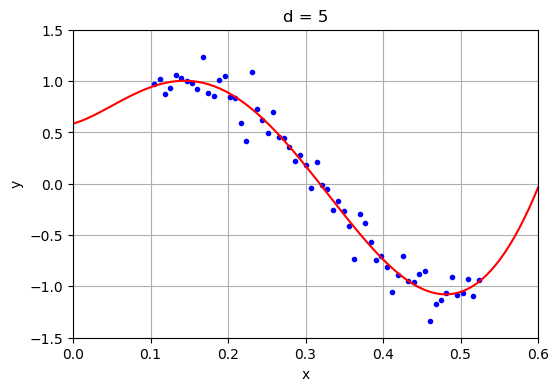

Academic license - for non-commercial use only
[-320.872, 619.059, -333.419, 41.1237, 2.18777, 0.584456]


In [193]:
# order of polynomial to use
k = 5

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

using Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])

@objective(m, Min, sum( (y - A*u).^2 ) )

status = solve(m)
uopt = getvalue(u)

npts = 100
xfine = linspace(0,0.6,npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt

figure(figsize=(6,4))
plot( x, y, "b.", markersize=6)
plot( xfine, yfine, "r-")
axis([0,0.6,-1.5,1.5])
xlabel("x")
ylabel("y")
title("d = 5")
grid()
println(uopt)

The coefficients for d = 5 are:

[-320.872, 619.059, -333.419, 41.1237, 2.18777, 0.584456]

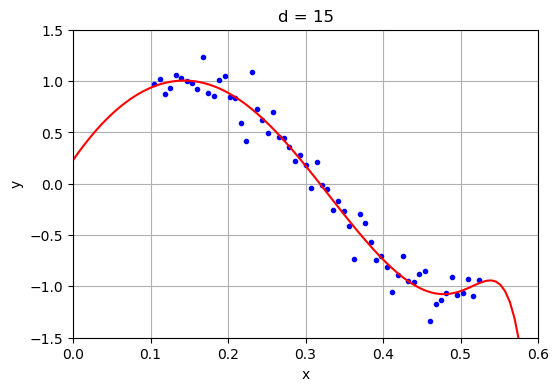

Academic license - for non-commercial use only
[-3.37904e5, 1.86649e5, 74678.9, -4481.85, -17029.3, -8090.89, -745.501, 1319.48, 774.64, 312.963, -144.165, -31.6809, 18.4594, -40.3935, 10.9502, 0.228989]


In [197]:
# order of polynomial to use
k = 15

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

using Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])

@objective(m, Min, sum( (y - A*u).^2 ) )

status = solve(m)
uopt = getvalue(u)

npts = 100
xfine = linspace(0,0.6,npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt

figure(figsize=(6,4))
plot( x, y, "b.", markersize=6)
plot( xfine, yfine, "r-")
axis([0,0.6,-1.5,1.5])
xlabel("x")
ylabel("y")
title("d = 15")
grid()
println(uopt)

The coefficients for d = 15 are:

[-3.37904e5, 1.86649e5, 74678.9, -4481.85, -17029.3, -8090.89, -745.501, 1319.48, 774.64, 312.963, -144.165, -31.6809, 18.4594, -40.3935, 10.9502, 0.228989]

The magnitudes of the coefficients for the resulting polynomial fits are pretty large.

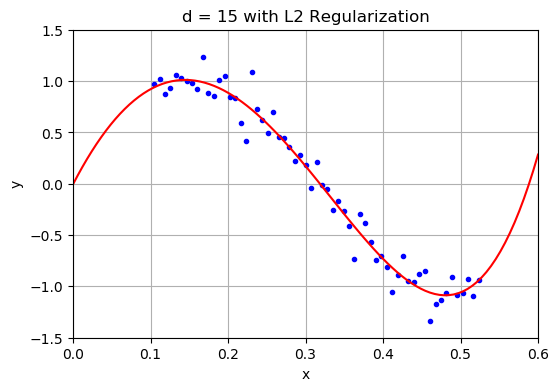

Academic license - for non-commercial use only
[-0.59465, -0.975681, -1.54994, -2.35464, -3.35103, -4.29544, -4.51095, -2.58953, 3.71018, 16.501, 33.9216, 42.0711, 11.6188, -55.0281, 14.6015, -0.00540095]


In [198]:
# order of polynomial to use
k = 15

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

using Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])

lambda = 10.0^(-6)

@objective(m, Min, sum( (y - A*u).^2 ) + lambda*sum(u.^2))

status = solve(m)
uopt = getvalue(u)

npts = 100
xfine = linspace(0,0.6,npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt

figure(figsize=(6,4))
plot( x, y, "b.", markersize=6)
plot( xfine, yfine, "r-")
axis([0,0.6,-1.5,1.5])
xlabel("x")
ylabel("y")
title("d = 15 with L2 Regularization")
grid()
println(uopt)

The coefficients for d = 15 with L2 regularization are:

[-0.59465, -0.975681, -1.54994, -2.35464, -3.35103, -4.29544, -4.51095, -2.58953, 3.71018, 16.501, 33.9216, 42.0711, 11.6188, -55.0281, 14.6015, -0.00540095]

For d = 15 with L2 regularization, the magnitudes of the coefficients in the resulting polynomial fit get smaller compared to the d = 15 without regularization.

(c).

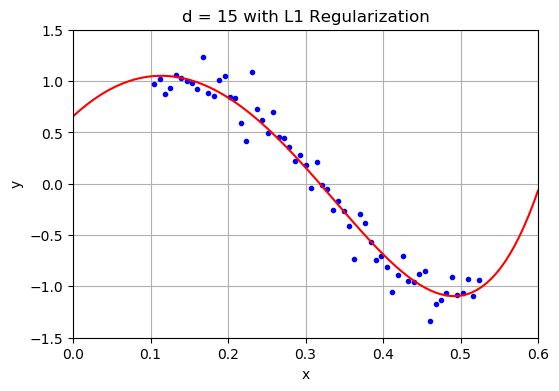

Academic license - for non-commercial use only
[2.43487e-10, 5.34564e-10, 1.15468e-9, 2.45414e-9, 5.12532e-9, 1.04964e-8, 2.10524e-8, 4.17518e-8, 8.68015e-8, 2.48375e-7, 80.299, 0.000831976, 1.06853e-7, -30.9977, 6.98704, 0.655913]


In [196]:
# order of polynomial to use
k = 15

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

using Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])
#slack variable to represent |u|
@variable(m, abs_u[1:k+1])
@constraint(m, abs_u .>= u)
@constraint(m, abs_u .>= -u)

lambda = 0.005

@objective(m, Min, sum( (y - A*u).^2 ) + lambda*sum(abs_u))

status = solve(m)
uopt = getvalue(u)

npts = 100
xfine = linspace(0,0.6,npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt

figure(figsize=(6,4))
plot( x, y, "b.", markersize=6)
plot( xfine, yfine, "r-")
axis([0,0.6,-1.5,1.5])
xlabel("x")
ylabel("y")
title("d = 15 with L1 Regularization")
grid()
println(uopt)

The coefficients for d = 15 with L1 regularization are:

[2.43487e-10, 5.34564e-10, 1.15468e-9, 2.45414e-9, 5.12532e-9, 1.04964e-8, 2.10524e-8, 4.17518e-8, 8.68015e-8, 2.48375e-7, 80.299, 0.000831976, 1.06853e-7, -30.9977, 6.98704, 0.655913]

Therefore, using $\lambda = 0.005$, we have the coefficients(rounding all the coefficients that are less than $10^{-5}$ to 0):


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80.299, 0.000831976, 0, -30.9977, 6.98704, 0.655913]


Which is a sparse solution.